# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.




## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas



Dataset link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview



### Install Required Libraries

In [6]:
!pip install numpy pandas  opendatasets scikit-learn xgboost --quiet

### Download Data from Kaggle



In [7]:
import opendatasets as od

In [8]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [9]:
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ajithchenthamara007
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:18<00:00, 90.9MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 46.8 s, sys: 18.5 s, total: 1min 5s
Wall time: 1min 55s


In [10]:
data_dir = './new-york-city-taxi-fare-prediction'

### View Dataset Files

In [11]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Apr 18 05:49 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Apr 18 05:49 sample_submission.csv
-rw-r--r-- 1 root root 960K Apr 18 05:49 test.csv
-rw-r--r-- 1 root root 5.4G Apr 18 05:50 train.csv


In [8]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [9]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [10]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [11]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [12]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [13]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.



### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so I am using the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows) is enough to train a model




In [12]:
import pandas as pd
import random

In [13]:
# Change this
sample_frac = 0.01

In [14]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv",
                 usecols=selected_cols,
                 dtype=dtypes,
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 1min 27s, sys: 1.71 s, total: 1min 29s
Wall time: 1min 34s


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


### Load Test Set



In [311]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [312]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization


### Training Set

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [314]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684618
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.308560
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,6.000000


In [315]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0
- `passenger_count` ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

Need to deal with outliers and data entry errors before we train our model.


### Test Set

In [316]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [317]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [318]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

### Exploratory Data Analysis and Visualization

**Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



#### Importing required ploting libraries

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


from matplotlib import pyplot as plt
df['fare_amount'].plot(kind='hist', bins=20, title='fare_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pickup_longitude'].plot(kind='hist', bins=20, title='pickup_longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['pickup_latitude'].plot(kind='hist', bins=20, title='pickup_latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['dropoff_longitude'].plot(kind='hist', bins=20, title='dropoff_longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='fare_amount', y='pickup_longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pickup_latitude', y='dropoff_longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pickup_datetime']
  ys = series['fare_amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pickup_datetime')
_ = plt.ylabel('fare_amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pickup_datetime']
  ys = series['pickup_longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pickup_datetime')
_ = plt.ylabel('pickup_longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pickup_datetime']
  ys = series['pickup_latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pickup_datetime')
_ = plt.ylabel('pickup_latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['pickup_datetime']
  ys = series['dropoff_longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('pickup_datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('pickup_datetime')
_ = plt.ylabel('dropoff_longitude')

from matplotlib import pyplot as plt
df['fare_amount'].plot(kind='line', figsize=(8, 4), title='fare_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pickup_longitude'].plot(kind='line', figsize=(8, 4), title='pickup_longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['pickup_latitude'].plot(kind='line', figsize=(8, 4), title='pickup_latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['dropoff_longitude'].plot(kind='line', figsize=(8, 4), title='dropoff_longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

ERROR:root:Did not find quickchart key chart-a7e25543-3b9b-42cf-afe2-be4ce88e85de in chart cache
ERROR:root:Did not find quickchart key chart-a7e25543-3b9b-42cf-afe2-be4ce88e85de in chart cache
ERROR:root:Did not find quickchart key chart-a7e25543-3b9b-42cf-afe2-be4ce88e85de in chart cache


In [67]:
df[df.passenger_count==208]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
441196,2.5,2014-02-12 09:28:00+00:00,0.0,0.0,0.0,0.0,208.0


while ploting a graph in one sample the passenger count is 208 so changed the value to the maximum number 6

In [320]:
df.loc[441196 , 'passenger_count'] = 6


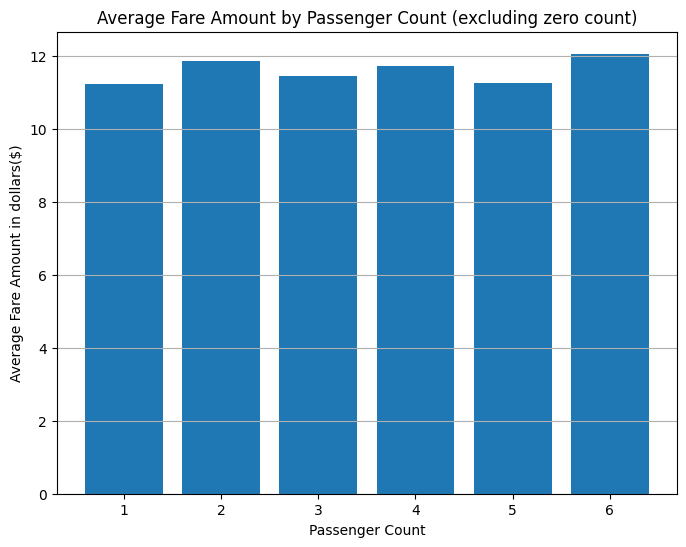

In [321]:
filtered_df = df[df['passenger_count'] != 0]

# Calculate average fare_amount for each passenger_count
avg_fare_by_passenger = filtered_df.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_fare_by_passenger['passenger_count'], avg_fare_by_passenger['fare_amount'])
plt.title('Average Fare Amount by Passenger Count (excluding zero count)')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount in dollars($)')
plt.grid(axis='y')
plt.show()

**observation**
- ther is no major difference in the price with number of passenger

In [322]:
hour_counts=df.pickup_datetime.dt.hour.value_counts()


<ipython-input-323-48f8e92dccb9>:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Counts')


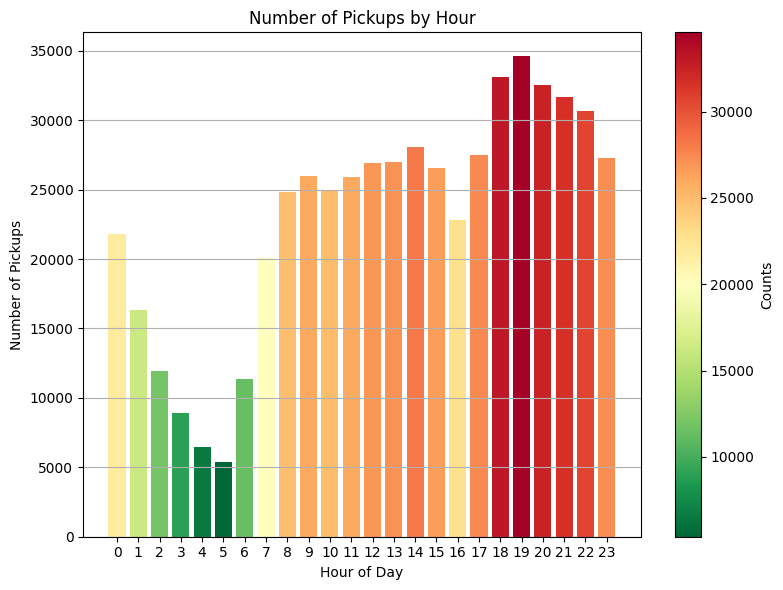

In [323]:

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Example DataFrame (assuming 'pickup_datetime' is a datetime column)

# Get value counts of hours in 'pickup_datetime' column
hour_counts = df['pickup_datetime'].dt.hour.value_counts()

# Create a colormap ranging from red to green
norm = Normalize(vmin=hour_counts.min(), vmax=hour_counts.max())
cmap = plt.cm.RdYlGn_r  # RdYlGn reversed colormap

# Plotting a bar graph with colormap
plt.figure(figsize=(8, 6))
bars = plt.bar(hour_counts.index, hour_counts.values, color=cmap(norm(hour_counts.values)))
plt.title('Number of Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.tight_layout()

# Add colorbar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Counts')

plt.xticks(hour_counts.index)  # Set x-axis ticks to match hour values
plt.grid(axis='y')

plt.show()


**observation**
- the peak houors are 6 pm to 10 pm in the range  < 30000
- there number of customers decreased tremendiusly during the period  12 am - 5 am


<ipython-input-324-2a2d98e18dfe>:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Counts')


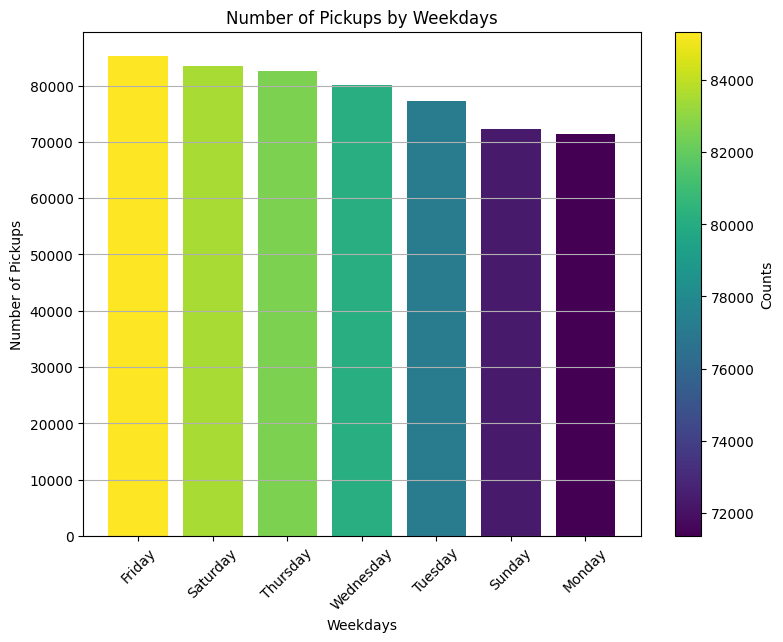

In [324]:
# Get value counts of week_days in 'pickup_datetime' column
week_days = df['pickup_datetime'].dt.day_name().value_counts()

# Create a colormap ranging from blue to yellow
norm = Normalize(vmin=week_days.min(), vmax=week_days.max())
cmap = plt.cm.viridis  # Using the 'viridis' colormap

# Plotting a bar graph with colormap
plt.figure(figsize=(8, 6))
bars = plt.bar(week_days.index, week_days.values, color=cmap(norm(week_days.values)))
plt.title('Number of Pickups by Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Number of Pickups')
plt.tight_layout()

# Add colorbar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Counts')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

plt.show()

<ipython-input-325-64d7b4e7add5>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Counts')


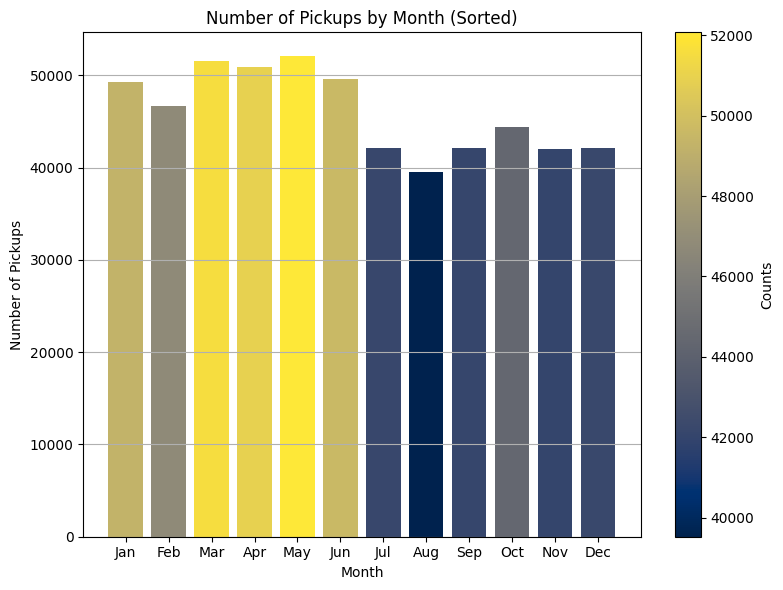

In [325]:
# Get value counts of months in 'pickup_datetime' column
months_counts = df['pickup_datetime'].dt.month.value_counts()

# Sort months in descending order based on counts
months_counts_sorted = months_counts.sort_values(ascending=False)

# Create a colormap ranging from blue to yellow
norm = Normalize(vmin=months_counts_sorted.min(), vmax=months_counts_sorted.max())
cmap = plt.cm.cividis  # Using the 'cividis' colormap

# Plotting a bar graph with colormap
plt.figure(figsize=(8, 6))
bars = plt.bar(months_counts_sorted.index, months_counts_sorted.values, color=cmap(norm(months_counts_sorted.values)))
plt.title('Number of Pickups by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.tight_layout()

# Add colorbar for reference
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Counts')

# Set x-axis ticks and labels dynamically for all months present in the data
months_labels = [pd.Timestamp(year=2024, month=month, day=1).strftime('%b') for month in months_counts_sorted.index]
plt.xticks(months_counts_sorted.index, months_labels)

plt.grid(axis='y')

plt.show()

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set
Set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.


In [326]:
from sklearn.model_selection import train_test_split

In [327]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [328]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

simply drop the rows with missing values instead of trying to fill them (since there are lot of training data)>

In [329]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [330]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [331]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [332]:
target_col = 'fare_amount'

#### Training

In [333]:
train_inputs = train_df[input_cols]

In [334]:
train_targets = train_df[target_col]

In [335]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [336]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

#### Validation

In [337]:
val_inputs = val_df[input_cols]

In [338]:
val_targets = val_df[target_col]

In [339]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [340]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [341]:
test_inputs = test_df[input_cols]        #the test data only have the inputs

In [342]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error

### Train & Evaluate Hardcoded Model

Creating a simple model that always predicts the average.

In [343]:
import numpy as np

In [344]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [345]:
mean_model = MeanRegressor()

In [346]:
mean_model.fit(train_inputs, train_targets)

In [347]:
mean_model.mean

11.354714

In [348]:
train_preds = mean_model.predict(train_inputs)

In [349]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [350]:
val_preds = mean_model.predict(val_inputs)

In [351]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [352]:
from sklearn.metrics import mean_squared_error

In [353]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [354]:
train_rmse

9.789782

In [355]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [356]:
val_rmse

9.899954

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

### Train & Evaluate Baseline Model

training a linear regression model as a baseline, which tries to express the target as a weighted sum of the inputs.

In [357]:
from sklearn.linear_model import LinearRegression

In [358]:
linreg_model = LinearRegression()

In [359]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [360]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.56340865, 11.27954152, 11.27907215, ..., 11.46867545,
       11.27921251, 11.27937956])

In [361]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.27926006, 11.27942778, 11.2797143 , ..., 11.8012885 ,
       11.27936607, 11.27906514])

In [362]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.788552273439734

In [363]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898077985428651

The linear regression model is off by $9.898, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [364]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [365]:
test_preds = linreg_model.predict(test_inputs)

In [215]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [366]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [368]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [369]:
generate_submission(test_preds, 'linreg_submission11.csv')

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop


### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [370]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [371]:
add_dateparts(train_df, 'pickup_datetime')

In [372]:
add_dateparts(val_df, 'pickup_datetime')

In [373]:
add_dateparts(test_df, 'pickup_datetime')

In [374]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


### Add Distance Between Pickup and Drop

using the haversine distance


In [375]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [376]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [377]:
%%time
add_trip_distance(train_df)

CPU times: user 44.5 ms, sys: 121 µs, total: 44.7 ms
Wall time: 86.5 ms


In [378]:
add_trip_distance(val_df)

In [379]:
add_trip_distance(test_df)

In [380]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
296314,7.5,2014-10-29 10:50:00+00:00,-73.979660,40.739746,-73.988113,40.739087,1.0,2014,10,29,2,10,0.715713
399260,7.0,2013-07-10 21:52:00+00:00,-73.982750,40.772079,-73.992798,40.756800,6.0,2013,7,10,2,21,1.896913
260924,8.9,2010-10-22 11:39:00+00:00,-73.974709,40.748138,-73.972504,40.760765,1.0,2010,10,22,4,11,1.415472
171654,16.0,2013-04-09 21:20:00+00:00,-73.959557,40.773956,-74.004211,40.741265,1.0,2013,4,9,1,21,5.227385
480446,8.1,2011-03-06 12:12:51+00:00,-73.976006,40.728649,-73.967934,40.757222,1.0,2011,3,6,6,12,3.246982


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [381]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.683987,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.307870,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834


In [382]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359


Using the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [383]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [384]:
train_df = remove_outliers(train_df)

In [385]:
val_df = remove_outliers(val_df)

### Save Intermediate DataFrames

saveing the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.



In [386]:
train_df.to_parquet('train.parquet')

In [387]:
val_df.to_parquet('val.parquet')

In [388]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models



- Ridge Regression
- Random Forests
- Gradient Boosting
- KNN


### Split Inputs & Targets

In [389]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance'],
      dtype='object')

In [390]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       ]

In [391]:
target_col = 'fare_amount'

In [392]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [393]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [394]:
test_inputs = test_df[input_cols]

Defining a  function to evaluate the models and generate test predictions

In [396]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [397]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [398]:
from sklearn.linear_model import Ridge

In [399]:
model1 = Ridge(random_state=42)

In [400]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 77 ms, sys: 185 ms, total: 262 ms
Wall time: 345 ms


Ridge(random_state=42)

In [401]:
evaluate(model1)

(5.29059770447608,
 5.44877405829597,
 array([ 8.64743999,  4.22411138,  9.37154744, ..., 11.58237832,
         8.07537835, 10.81768582]),
 array([11.95290003,  6.41676272, 46.34295629, ...,  9.04531314,
        22.97907868,  9.01956897]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [402]:
predict_and_submit(model1, 'ridge_submission11.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.605752
1,2015-01-27 13:08:24.0000003,11.251628
2,2011-10-08 11:53:44.0000002,5.503124
3,2012-12-01 21:12:12.0000002,8.671980
4,2012-12-01 21:12:12.0000003,15.636300
...,...,...
9909,2015-05-10 12:37:51.0000002,9.653688
9910,2015-01-12 17:05:51.0000001,12.212153
9911,2015-04-19 20:44:15.0000001,47.712077
9912,2015-01-31 01:05:19.0000005,22.490898


**Val_RMSE = 5.15766**

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [403]:
from sklearn.ensemble import RandomForestRegressor

In [404]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [405]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 3min 58s, sys: 6.92 s, total: 4min 5s
Wall time: 3min 25s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [406]:
evaluate(model2)

(3.6271808645977517,
 4.183976770071795,
 array([ 6.79849933,  9.06521038,  9.32298825, ...,  9.87012689,
         7.76473726, 10.52016462]),
 array([12.46017513,  6.16928253, 47.32930137, ...,  8.80147527,
        28.89261332,  8.47105061]))

In [407]:
predict_and_submit(model2, 'rf_submission11.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.601005
1,2015-01-27 13:08:24.0000003,10.601005
2,2011-10-08 11:53:44.0000002,5.022913
3,2012-12-01 21:12:12.0000002,8.567817
4,2012-12-01 21:12:12.0000003,15.223310
...,...,...
9909,2015-05-10 12:37:51.0000002,8.844797
9910,2015-01-12 17:05:51.0000001,12.540524
9911,2015-04-19 20:44:15.0000001,55.226707
9912,2015-01-31 01:05:19.0000005,21.829241


**Val_RMSE = 3.36044**

### Gradient Boosting



In [408]:
from xgboost import XGBRegressor

In [409]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [410]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 8.17 s, sys: 272 ms, total: 8.44 s
Wall time: 7.3 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [411]:
evaluate(model3)

(3.1907222,
 4.0691333,
 array([ 6.051569 ,  9.250197 , 10.082516 , ..., 12.1444235,  9.220731 ,
        10.230894 ], dtype=float32),
 array([14.973961 ,  5.810273 , 47.92007  , ...,  8.14151  , 30.83048  ,
         8.9577265], dtype=float32))

In [412]:
predict_and_submit(model3, 'xgb_submission11.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.445037
1,2015-01-27 13:08:24.0000003,10.704104
2,2011-10-08 11:53:44.0000002,4.518761
3,2012-12-01 21:12:12.0000002,9.183941
4,2012-12-01 21:12:12.0000003,16.170015
...,...,...
9909,2015-05-10 12:37:51.0000002,8.884284
9910,2015-01-12 17:05:51.0000001,10.817518
9911,2015-04-19 20:44:15.0000001,52.771400
9912,2015-01-31 01:05:19.0000005,20.052116


**Val_RMSE = 3.23867**

## 8. Tune Hyperparmeters





In [413]:


def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse


In [414]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

In [416]:
best_params['n_estimators'] = 250

In [415]:
%%time
test_params(XGBRegressor, **best_params)

CPU times: user 11.5 s, sys: 453 ms, total: 12 s
Wall time: 14.3 s


(3.1907222, 4.0691333)

### Max Depth

In [417]:
%%time
test_params(XGBRegressor, **best_params)

CPU times: user 22.6 s, sys: 797 ms, total: 23.4 s
Wall time: 19.3 s


(2.8210828, 4.0773063)

Looks like a max depth of 5 is ideal.

In [418]:
best_params['max_depth'] = 5

In [419]:
test_params(XGBRegressor, **best_params)

(3.1468055, 4.0694685)

### Learning Rate

In [421]:
best_params['learning_rate'] = .05

In [422]:
test_params(XGBRegressor, **best_params)

(3.697914, 4.127926)

In [423]:
best_params['learning_rate'] = .1
test_params(XGBRegressor, **best_params)

(3.4930112, 4.0775414)

In [424]:
best_params['learning_rate'] = .25
test_params(XGBRegressor, **best_params)


(3.2032537, 4.0491138)

In [425]:
best_params['learning_rate'] = .3
test_params(XGBRegressor, **best_params)

(3.1468055, 4.0694685)

Seems like the best learning rate is 0.25.

In [426]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters.

Here's a set of parameters that works well:

In [427]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1,
                               subsample=0.8, colsample_bytree=0.8)

In [428]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 34.1 s, sys: 912 ms, total: 35.1 s
Wall time: 34.3 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [431]:
evaluate(xgb_model_final)

(3.2898693,
 4.0790014,
 array([ 6.7565117,  8.700582 , 10.074144 , ..., 11.429992 ,  9.072854 ,
        10.3118725], dtype=float32),
 array([13.828753,  6.101374, 48.34153 , ...,  7.846509, 30.306885,
         8.824189], dtype=float32))

In [430]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission11.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.824496
1,2015-01-27 13:08:24.0000003,11.088350
2,2011-10-08 11:53:44.0000002,4.595298
3,2012-12-01 21:12:12.0000002,8.927239
4,2012-12-01 21:12:12.0000003,15.138245
...,...,...
9909,2015-05-10 12:37:51.0000002,8.580895
9910,2015-01-12 17:05:51.0000001,11.724052
9911,2015-04-19 20:44:15.0000001,52.663029
9912,2015-01-31 01:05:19.0000005,20.113441


**Val_RMSE = 3.31577**

**Experiment tracking spreadsheet :-** https://docs.google.com/spreadsheets/d/16khY2oitVWpJ8_IVTAneH1FzYaf5T4t5tHm48n7tQ14/edit?usp=sharing

## References

* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs
